## Intermediate Spatial Thinking 

# Exploration

Now, it is your turn to explore with different criteria weights to see how things are changing.  Try changing weights (e.g. each of them can be equal this time) and compare the outputs. How do the maps differ? This will be your playground to explore and reinforce what you have learned during the Intermediate Spatial Thinking lesson.

<b>Note</b>: Do not forget to make sure your weights add up to 1.


### Read the criteria layers and standardize them

In [1]:
import numpy as np

for i in range(1, 6):
    nArray = np.loadtxt("supplementary/n"+str(i)+".txt", skiprows=6)
    masked_nArray = np.ma.array(nArray, mask=(nArray==-9999))
    nmax = masked_nArray.max() 
    nmin = masked_nArray.min()

    nrange = nmax- nmin 
    standardizednArray = (masked_nArray - nmin)/nrange
    nstdmax = standardizednArray.max() 
    nstdmin = standardizednArray.min()
    print("Standardized max is : " +str(nstdmax)+ " and standardized min is : "+str(nstdmin)) 
    np. savetxt("supplementary/stdn"+str(i)+".txt", standardizednArray, fmt='%1.3f', delimiter=' ')

Standardized max is : 1.0 and standardized min is : 0.0
Standardized max is : 1.0 and standardized min is : 0.0
Standardized max is : 1.0 and standardized min is : 0.0
Standardized max is : 1.0 and standardized min is : 0.0
Standardized max is : 1.0 and standardized min is : 0.0


### Read the criteria weights (change them if you wish, but make sure they add up to 1)

In [2]:
# make the figure with subplots
weight_list = [0.2, 0.2, 0.2, 0.2, 0.2]

In [3]:
print("Weight sum is equal to %5.2f" %(sum(weight_list)))

Weight sum is equal to  1.00


 ### Generate the weighted layers

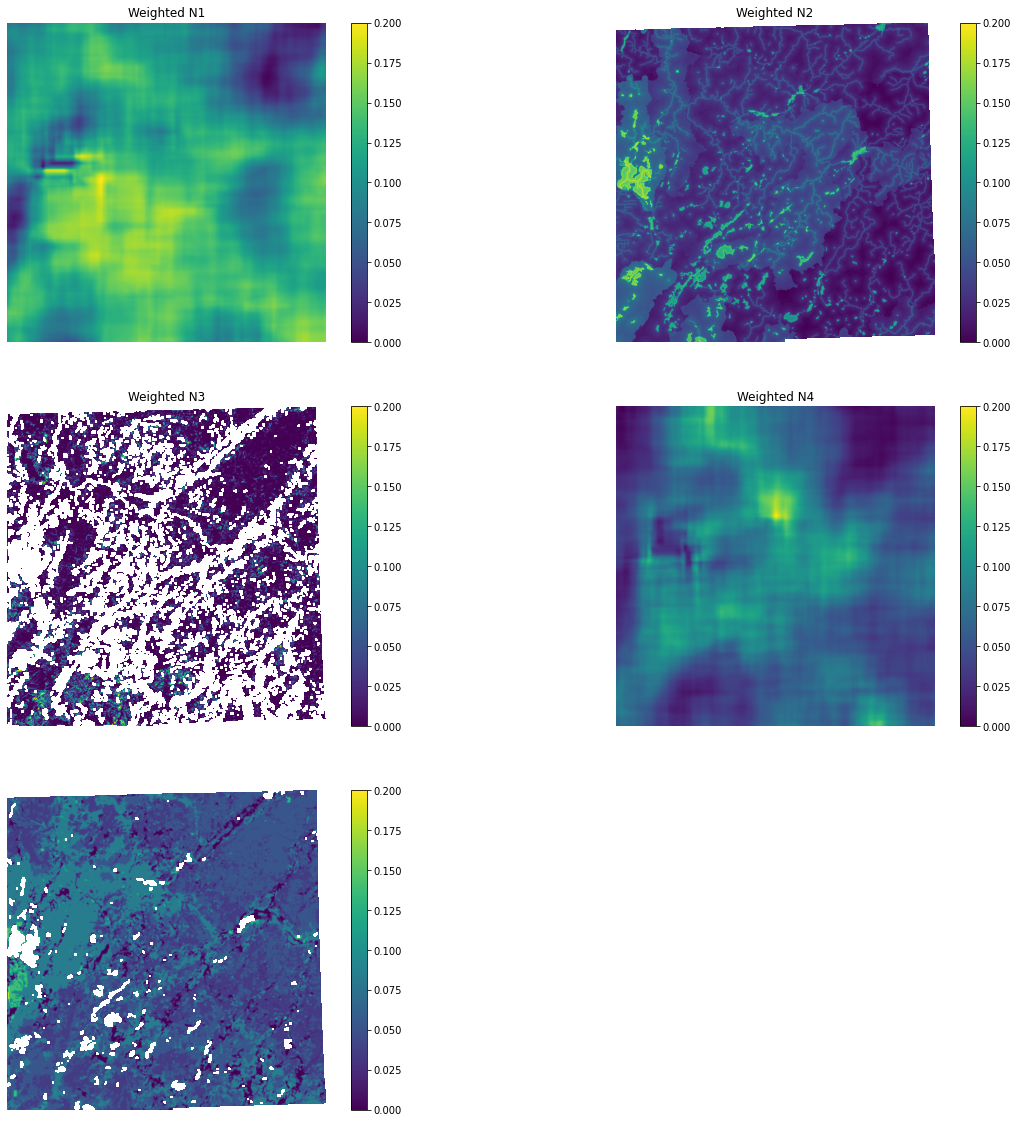

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(1, len(weight_list)+1):
  
    C = np.loadtxt("supplementary/stdn"+str(i)+".txt") 
    C = np.ma.array(C, mask=(C==-9999)) 
    weighted_std= weight_list[i-1]*C
    plt.title("Weighted N"+str(i-1))
    plt.subplot(3,2,i)
    plt.imshow(weighted_std)
    plt.axis('off')
    plt.colorbar()

### Calculate the weighted overlay

In [6]:
from scipy.stats import rankdata

overall = np.empty((1314,1308))
overall = np.ma.array(overall, mask=(overall==-9999)) 

for i in range(1, len(weight_list)+1):
    C = np.loadtxt("supplementary/stdn"+str(i)+".txt") 
    C = np.ma.array(C, mask=(C==-9999)) 
    weighted_std= weight_list[i-1]*C
    overall += weighted_std
ranked_overall = rankdata(overall, method='dense').reshape(overall.shape)

print ("Maximum overall EBI Score is : %5.2f" %(overall.max()))
print("The EBI Scores range from "+str(ranked_overall.min())+" to " +str(ranked_overall.max()))
print("The best cell is located at row " +str(np.argmax(np.max(ranked_overall, axis=1)))+ " and column " +\
     str(np.argmax(np.max(ranked_overall, axis=0))))
print("And finally that cell's EBI Score is :  %5.2f" %(overall[np.argmax(np.max(ranked_overall, axis=1))]\
     [np.argmax(np.max(ranked_overall, axis=0))]))

Maximum overall EBI Score is :  0.71
The EBI Scores range from 1 to 9036
The best cell is located at row 784 and column 672
And finally that cell's EBI Score is :   0.71
